# Предобработка данных


Приведение данных к нижнему регистру

In [1]:
import pandas as pd

# Загрузка данных из XLSX файла
df = pd.read_excel('query-17107782287526-17108569750917-Выгрузка-1710856973 copy.xlsx')

# Приведение всего текста в таблице к нижнему регистру
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Сохраняем изменения в новый XLSX файл
df.to_excel('finishdata.xlsx', index=False)



C:\Users\User\AppData\Local\Temp\ipykernel_15112\3802110428.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\User\AppData\Local\Temp\ipykernel_15112\3802110428.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


Определение критических значений их пропущенных значений

In [11]:
# Импортируем библиотеку для работы с данными
import pandas as pd

# Загрузка данных из XLSX файла
df = pd.read_excel('finishdata.xlsx')

# Определяем порог для критических значений (10%)
threshold = 0.1

# Подсчитываем пропущенные значения в каждой строке
missing_values = df.isnull().sum(axis=1)

# Подсчитываем пропущенные значения в каждом столбце
missing_values_per_column = df.isnull().sum()

# Определяем критические строки, где количество пропущенных значений превышает порог
critical_rows = df[missing_values > threshold * df.shape[1]]

# Определяем критические столбцы, где количество пропущенных значений превышает порог
critical_columns = missing_values_per_column[missing_values_per_column > threshold * df.shape[0]].index

# Вывод критических строк
print("Критические строки:")
print(critical_rows)

# Вывод критических столбцов
print("\nКритические столбцы:")
print(critical_columns)


Критические строки:
                                     Название вакансии Дата публикации  \
4                                         data analyst      2024-02-21   
5                         аналитик данных (rambler&co)      2024-02-21   
7                                      аналитик данных      2024-01-26   
8                               младший разработчик bi      2024-01-12   
10                           веб-аналитик/web-аналитик      2024-02-09   
..                                                 ...             ...   
189                                    аналитик данных      2023-12-19   
191  middle/ senior cv engineer в команду computer ...      2024-01-22   
192                  бизнес-аналитик / аналитик данных      2024-01-22   
193                                        bi-аналитик      2024-01-22   
199                                      специалист bi      2023-12-22   

                                     Описание вакансии  \
4    мы, ведущая онлайн-служба до

Определение количество пропущенных строк и расчет погрешности

In [10]:
# Импортируем библиотеку для работы с данными
import pandas as pd

# Загрузка данных из XLSX файла
df = pd.read_excel('finishdata.xlsx')

# Подсчитываем общее количество значений в таблице
total_values = df.shape[0] * df.shape[1]

# Подсчитываем количество пропущенных значений
missing_values = df.isnull().sum().sum()

# Вычисляем погрешности в процентах
error_percentage = (missing_values / total_values) * 100

# Выводим результаты на экран
print(f"Общее количество значений: {total_values}")
print(f"Количество пропущенных значений: {missing_values}")
print(f"Погрешность: {error_percentage:.2f}%")


Общее количество значений: 1800
Количество пропущенных значений: 80
Погрешность: 4.44%


Вывод типов данных

In [48]:
# Импортируем библиотеку для работы с данными
import pandas as pd

# Загрузка данных из XLSX файла
df = pd.read_excel('finishdata.xlsx')

# Выводим информацию о типах данных до преобразования
print("Типы данных до преобразования:")
print(df.dtypes)


# Преобразование типа данных столбца к строке
df['Название региона'] = df['Название региона'].astype(str)
print(df.dtypes)


Типы данных до преобразования:
Название вакансии            object
Дата публикации      datetime64[ns]
Описание вакансии            object
Работодатель                 object
Ключевые навыки              object
Название региона             object
График работы                object
Опыт работы                  object
Заработная плата              int64
dtype: object
Название вакансии            object
Дата публикации      datetime64[ns]
Описание вакансии            object
Работодатель                 object
Ключевые навыки              object
Название региона             object
График работы                object
Опыт работы                  object
Заработная плата              int64
dtype: object


# Анализ плотности

C:\Users\User\AppData\Local\Temp\ipykernel_15428\1116688856.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], shade = True)


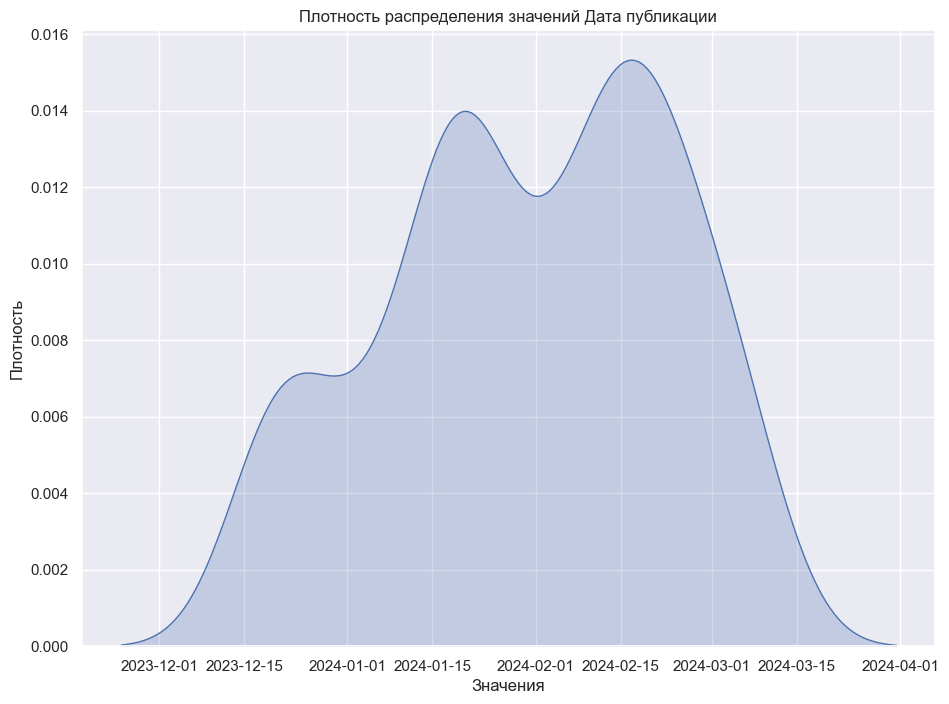

C:\Users\User\AppData\Local\Temp\ipykernel_15428\1116688856.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column1], shade = True)


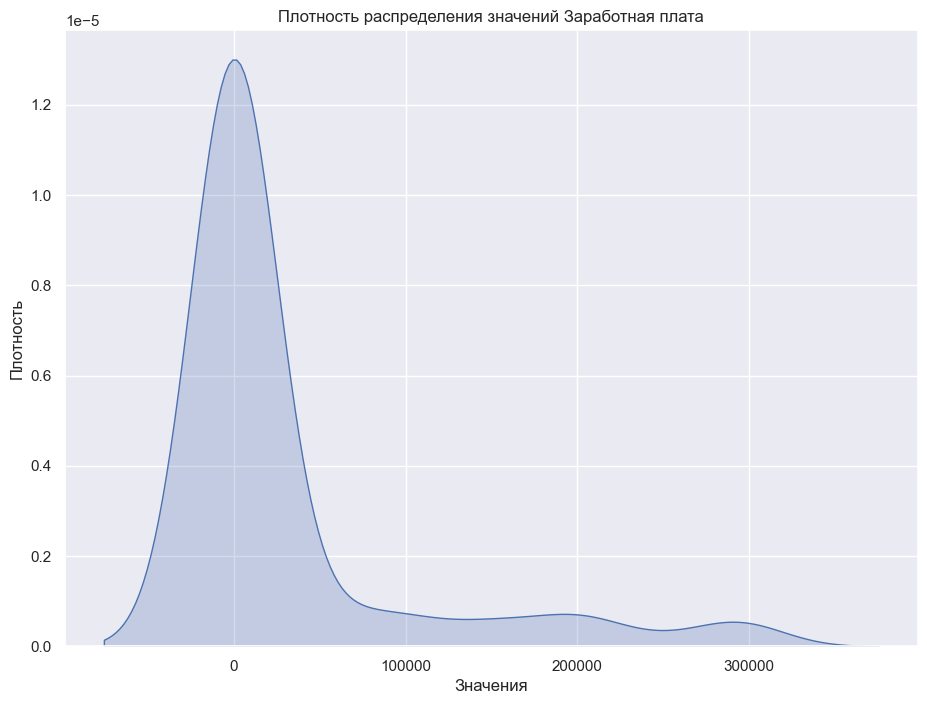

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из файла Excel
df = pd.read_excel('finishdata.xlsx')

# Указание столбца, для которого нужно построить график плотности распределения
column = 'Дата публикации'
column1 = 'Заработная плата'
# Задаем размер нашего графика
sns.set(rc={'figure.figsize':(11,8)})
# Создание графика плотности распределения 
sns.kdeplot(data=df[column], shade = True)
plt.title(f'Плотность распределения значений {column}')
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.savefig(f'{column}.jpg', format='jpg', bbox_inches='tight')
plt.show()

sns.set(rc={'figure.figsize':(11,8)})
# Создание графика плотности распределения 
sns.kdeplot(data=df[column1], shade = True)
plt.title(f'Плотность распределения значений {column1}')
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.savefig(f'{column1}.jpg', format='jpg', bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загружаем наш файл в формате xlsx
df = pd.read_excel('finishdata.xlsx')

# Создаем переменные, которые будут хранить название столбцов
column_name = 'Работодатель'
column_name1 = 'Название региона'
column_name2 = 'Название вакансии'
column_name3 = 'Описание вакансии'
column_name4 = 'Ключевые навыки'
column_name5 = 'График работы'
column_name6 = 'Опыт работы'



# Проверяем условие, если выбранный столбец является типом object, тогда строим график плотности и сохраняем его в формате .jpg
if df[column_name].dtype == 'object':
    plt.figure(figsize=(26, 6))
    sns.set(rc={'figure.figsize':(11,8)})
    sns.countplot(data=df, x=column_name, palette='Set3')
    plt.title(f'Название столбца: {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=90) 
    plt.savefig(f'{column_name}.jpg', format='jpg', bbox_inches='tight')
    plt.show()
else:
    print(f'Столбец {column_name} не является типо данных object.')

    
# Проверяем условие, если выбранный столбец является типом object, тогда строим график плотности и сохраняем его в формате .jpg
if df[column_name1].dtype == 'object':
    plt.figure(figsize=(26, 6))
    sns.set(rc={'figure.figsize':(11,8)})
    sns.countplot(data=df, x=column_name1, palette='Set3')
    plt.title(f'Название столбца: {column_name1}')
    plt.xlabel(column_name1)
    plt.ylabel('Count')
    plt.xticks(rotation=90) 
    plt.savefig(f'{column_name1}.jpg', format='jpg', bbox_inches='tight')

    plt.show()
else:
    print(f'Столбец {column_name1} не является типо данных object.')

    


# Проверяем условие, если выбранный столбец является типом object, тогда строим график плотности и сохраняем его в формате .jpg
if df[column_name2].dtype == 'object':
    plt.figure(figsize=(26, 6))
    sns.set(rc={'figure.figsize':(11,8)})
    sns.countplot(data=df, x=column_name2, palette='Set3')
    plt.title(f'Название столбца: {column_name2}')
    plt.xlabel(column_name2)
    plt.ylabel('Count')
    plt.xticks(rotation=90) 
    plt.savefig(f'{column_name2}.jpg', format='jpg', bbox_inches='tight')

    plt.show()
else:
    print(f'Столбец {column_name2} не является типо данных object.')

# Проверяем условие, если выбранный столбец является типом object, тогда строим график плотности и сохраняем его в формате .jpg
if df[column_name3].dtype == 'object':
    plt.figure(figsize=(26, 6))
    sns.set(rc={'figure.figsize':(11,8)})
    sns.countplot(data=df, x=column_name3, palette='Set3')
    plt.title(f'Название столбца: {column_name3}')
    plt.xlabel(column_name3)
    plt.ylabel('Count')
    plt.xticks(rotation=90) 
    plt.savefig(f'{column_name3}.jpg', format='jpg', bbox_inches='tight')

    plt.show()
else:
    print(f'Столбец {column_name3} не является типо данных object.')

# Проверяем условие, если выбранный столбец является типом object, тогда строим график плотности и сохраняем его в формате .jpg
if df[column_name4].dtype == 'object':
    plt.figure(figsize=(26, 6))
    sns.set(rc={'figure.figsize':(11,8)})
    sns.countplot(data=df, x=column_name4, palette='Set3')
    plt.title(f'Название столбца: {column_name4}')
    plt.xlabel(column_name4)
    plt.ylabel('Count')
    plt.xticks(rotation=90) 
    plt.savefig(f'{column_name4}.jpg', format='jpg', bbox_inches='tight')
    plt.show()
else:
    print(f'Столбец {column_name4} не является типо данных object.')


if df[column_name5].dtype == 'object':
    plt.figure(figsize=(26, 6))
    sns.set(rc={'figure.figsize':(11,8)})
    sns.countplot(data=df, x=column_name5, palette='Set3')
    plt.title(f'Название столбца: {column_name5}')
    plt.xlabel(column_name5)
    plt.ylabel('Count')
    plt.xticks(rotation=90) 
    plt.savefig(f'{column_name5}.jpg', format='jpg', bbox_inches='tight')
    plt.show()
else:
    print(f'Столбец {column_name5} не является типо данных object.')

# Проверяем условие, если выбранный столбец является типом object, тогда строим график плотности и сохраняем его в формате .jpg
if df[column_name6].dtype == 'object':
    plt.figure(figsize=(26, 6))
    sns.set(rc={'figure.figsize':(11,8)})
    sns.countplot(data=df, x=column_name6, palette='Set3')
    plt.title(f'Название столбца: {column_name6}')
    plt.xlabel(column_name6)
    plt.ylabel('Count')
    plt.xticks(rotation=90) 
    plt.savefig(f'{column_name6}.jpg', format='jpg', bbox_inches='tight')

    plt.show()
else:
    print(f'Столбец {column_name6} не является типо данных object.')

